### Run Kernel PCA using RBF kernel

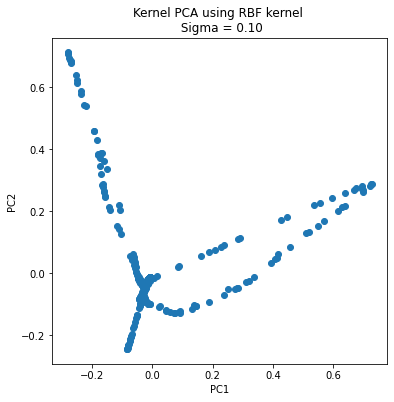

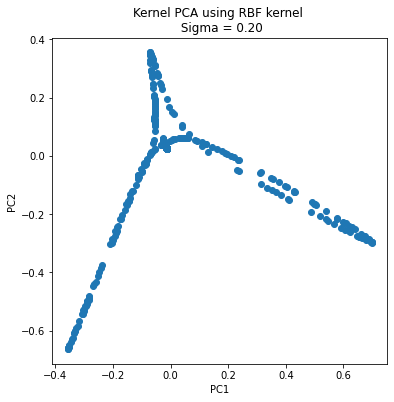

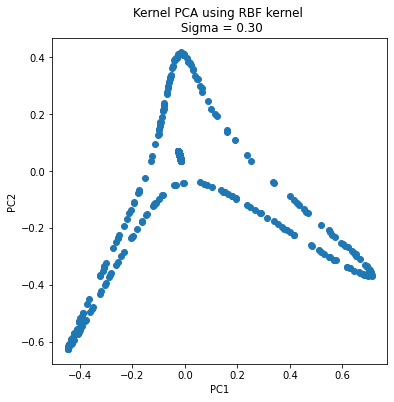

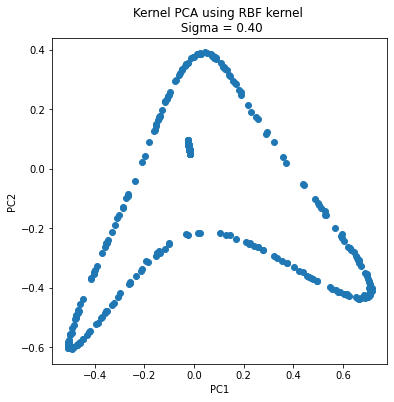

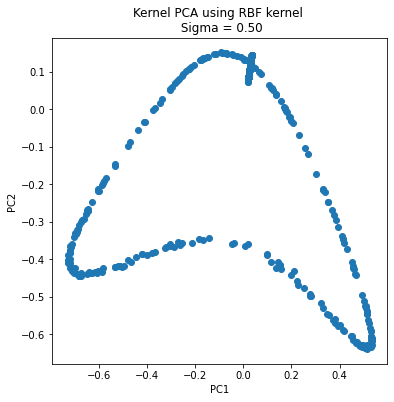

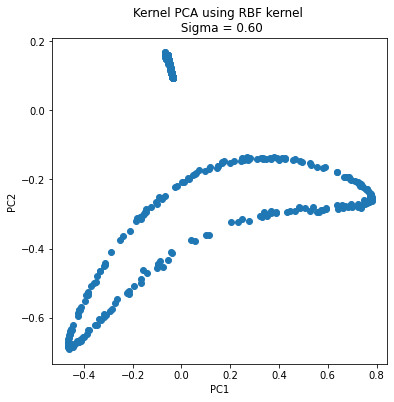

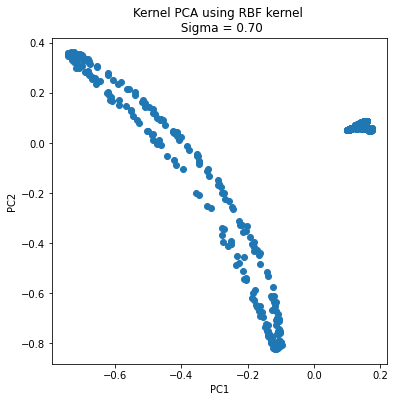

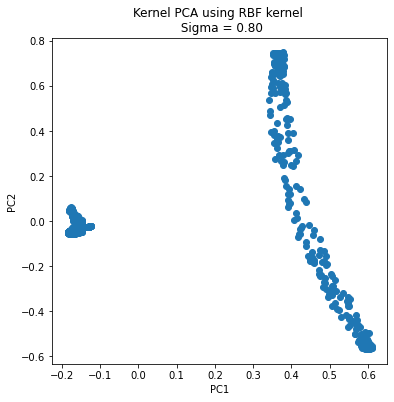

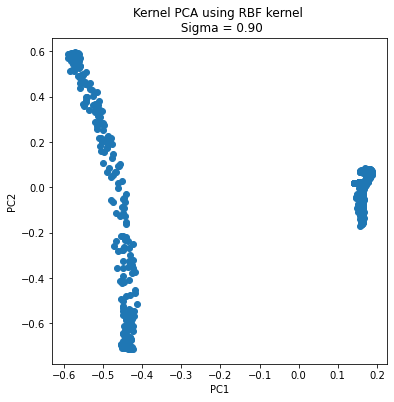

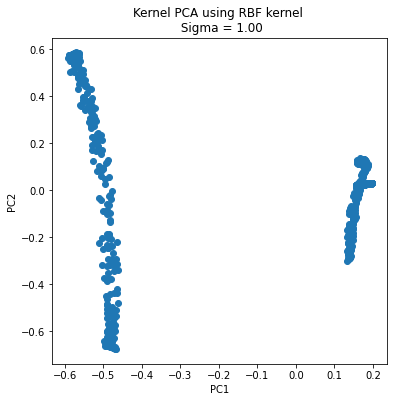

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import eigh

df = pd.read_csv("/content/Dataset.csv", names=['x', 'y']);

input_data_set = df.iloc[:, :].values

def get_pairwsie_distance_matrix(input_array):
  num_data_points = input_array.shape[0]
  dist_pairwise = np.zeros((num_data_points, num_data_points))
  for i in range(num_data_points):
    distances = np.sum((input_array - input_array[i]) ** 2, axis=1)
    dist_pairwise[:, i] = distances

  return dist_pairwise.T

def get_rbf_kernel(pairwsie_dist_mat, sigma):

  # Compute the kernel matrix.
  gamma = 1/(2 * ((sigma) ** 2))
  K = np.exp(-gamma * pairwsie_dist_mat)

  # Center the kernel matrix.
  N = K.shape[0]
  ones_mat = np.ones((N, N))
  col_wise_sum = np.matmul(ones_mat, K) / N #ij entry = 1/N * sum of jth column
  row_wise_sum = np.matmul(K, ones_mat) / N #ij entry = 1/N * sum of ith row

  row_wise_sum_of_col_wise_sum = np.matmul(col_wise_sum, ones_mat) / N
  K_centered = K - col_wise_sum - row_wise_sum + row_wise_sum_of_col_wise_sum

  return K_centered

def rbf_kernel_pca(K, components):

  eigvals, eigvecs = eigh(K)
  eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1] #sort in descending order

  PCs = np.column_stack([(eigvecs[:, i]/np.sqrt(eigvals[i])) for i in range(components)]) # Top k normalized eigenvectors

  project_vals = K.dot(PCs)
  return project_vals

pairwsie_distance_matrix = get_pairwsie_distance_matrix(input_data_set)

for i in range(10):
  sigma = (i + 1)/10 
  KC = get_rbf_kernel(pairwsie_distance_matrix, sigma)
  pc_vals = rbf_kernel_pca(KC, components=2)

  plt.figure(figsize=(6,6))

  plt.title("Kernel PCA using RBF kernel \n Sigma = {0:.2f}".format(sigma))
  plt.xlabel("PC1")
  plt.ylabel("PC2")
  plt.scatter(pc_vals[:, 0], pc_vals[:, 1])

  plt.show()
  